## Import

In [1]:
import pandas as pd # for data handling
from sklearn.model_selection import cross_val_score # for cross-validation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # evaluation metrics
import matplotlib.pyplot as plt # for plotting
# use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Get data
Specify the complete path for the zip file containing data. Make sure that the drive is mounted.


In [2]:
! unzip './hw2-1.q1.data.zip'

unzip:  cannot find or open ./hw2-1.q1.data.zip, ./hw2-1.q1.data.zip.zip or ./hw2-1.q1.data.zip.ZIP.


In [3]:
# Read data from CSV files into pandas dataframes
train = pd.read_csv('final.q2.train.csv') # training data
test = pd.read_csv('final.q2.test.csv') # test data
new = pd.read_csv('final.q2.new.csv') # unlabeled data
# Show number of rows and columns in each dataframe
print('train contains %d rows and %d columns' %train.shape)
print('test contains %d rows and %d columns' %test.shape)
print('new contains %d rows and %d columns' %new.shape)
print('First 3 rows in train:')
train.head(3) # display first 3 training samples

train contains 10000 rows and 41 columns
test contains 2000 rows and 41 columns
new contains 30 rows and 41 columns
First 3 rows in train:


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40
0,1.0,0.835,0.902,0.249,0.809,0.244,0.569,0.947,0.139,0.536,...,0.131,0.667,0.564,0.244,0.446,0.543,0.607,0.239,0.650,0.203
1,0.0,0.957,0.839,0.337,0.542,0.136,0.322,0.529,0.512,0.931,...,0.960,0.656,0.319,0.357,0.161,0.300,0.070,0.118,0.690,0.623
2,0.0,0.017,0.167,0.368,0.564,0.817,0.133,0.351,0.420,0.807,...,0.126,0.556,0.171,0.617,0.114,0.193,0.910,0.078,0.595,0.805


## Specify inputs and outputs

In [4]:
features = list(train)[1:] # all but the first column header are feature names
print("features:", features)
X_train, X_test, X_new = train[features], test[features], new[features]
y_train, y_test = train.y, test.y
print('Shapes:')
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, X_new: {X_new.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')

features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40']
Shapes:
X_train: (10000, 40), X_test: (2000, 40), X_new: (30, 40)
y_train: (10000,), y_test: (2000,)


## Choose good hyper-parameters for decision tree through cross-validation
We shall vary the maximum number of leaf nodes (rules) in the tree and chose the minimum number of rules that lead to satisfactory classification accuracy.

In [5]:
for k in range(2,10): # number of rules
    model = DecisionTreeClassifier(max_leaf_nodes=k)
    score = cross_val_score(model, X_train, y_train, cv=5).mean() # mean cross-validation accuracy
    print(f'Mean cross-validation accuracy with {k} rules = {score:0.4f}')

Mean cross-validation accuracy with 2 rules = 0.6947
Mean cross-validation accuracy with 3 rules = 0.8466
Mean cross-validation accuracy with 4 rules = 0.9317
Mean cross-validation accuracy with 5 rules = 0.9315
Mean cross-validation accuracy with 6 rules = 0.9312
Mean cross-validation accuracy with 7 rules = 0.9305
Mean cross-validation accuracy with 8 rules = 0.9311
Mean cross-validation accuracy with 9 rules = 0.9300


## Select a good model
In this case, a tree with fewer than 4 leaf nodes underfits and a tree with more than 4 leaf nodes overfits. So choose *max_leaf_nodes* = 4.

In [6]:
k = 4 # selected value for max_leaf_nodes
chosen_model = DecisionTreeClassifier(max_leaf_nodes=k)
chosen_model

DecisionTreeClassifier(max_leaf_nodes=4)

## Train chosen model

In [7]:
chosen_model.fit(X_train, y_train) # train selected model on ALL training examples

DecisionTreeClassifier(max_leaf_nodes=4)

## Evaluate trained model on test samples

In [8]:
predicted = chosen_model.predict(X_test) # predicted y for test examples
acc = accuracy_score(y_test, predicted) # accuracy on test samples
print(f'Accuracy on test samples = {acc:0.4f}') # show test accuracy
print("Classification report on test samples:") # for precision, recall, F1-score
print(classification_report(y_test, predicted, digits=4)) # rounded to 4 decimal places

Accuracy on test samples = 0.9355
Classification report on test samples:
              precision    recall  f1-score   support

         0.0     0.9290    0.9446    0.9367      1011
         1.0     0.9424    0.9262    0.9342       989

    accuracy                         0.9355      2000
   macro avg     0.9357    0.9354    0.9355      2000
weighted avg     0.9356    0.9355    0.9355      2000



### Confusion matrix

In [9]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
cm.to_csv('cm.csv') # save confusion matrix
cm # display confusion matrix

,0,1
0,955,56
1,73,916


## Predict output for unlabeled samples

In [10]:
predicted_new = chosen_model.predict(X_new) # predicted classes for unlabeled samples
new_prediction = pd.DataFrame() # dataframe with predicted classes
new_prediction['ID'] = new.ID # identifiers for unlabeled samples
new_prediction['y'] = predicted_new # # predicted classes for unlabeled samples
new_prediction.to_csv('hw2.q1.prediction.csv', index=False) # save as CSV file
new_prediction # display results

,ID,y
0,ID_001,0.0
1,ID_002,0.0
2,ID_003,0.0
3,ID_004,0.0
4,ID_005,0.0
5,ID_006,0.0
6,ID_007,0.0
7,ID_008,0.0
8,ID_009,0.0
9,ID_010,0.0


## Extract rules

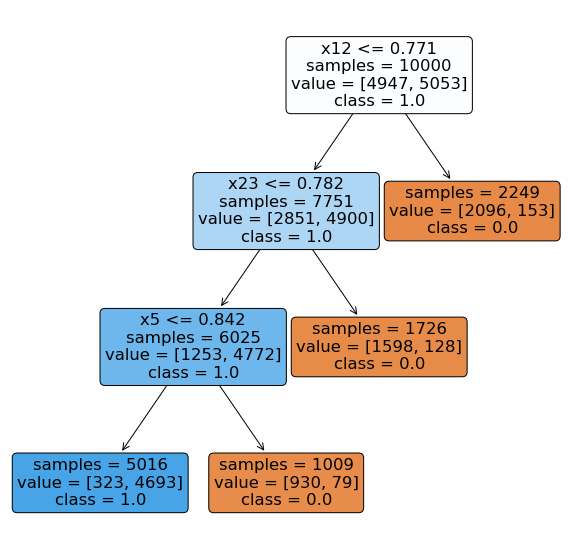

In [11]:
plt.figure(figsize=(10, 10)) # size of figure to be displayed

plot_tree(chosen_model,
          feature_names=features,
          class_names=[f'{c}' for c in chosen_model.classes_],
          filled=True, rounded=True, impurity=False) # plot tree

plt.savefig("hw2.q1.decision_tree.png") # save as PNG file
plt.show() # show tree

You can confirm that only input features *x_4*, *x_12*, and *x_22* are relevant

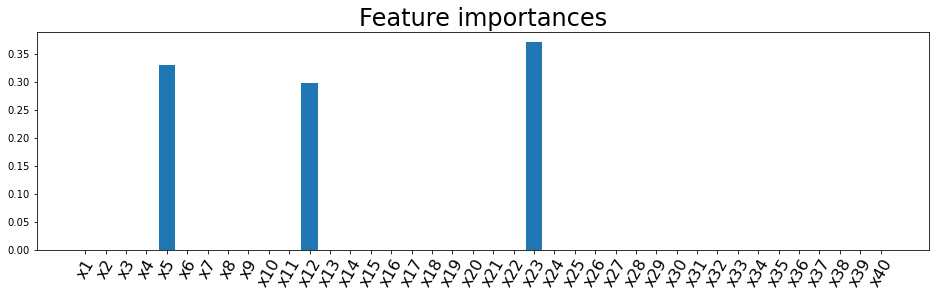

In [12]:
plt.figure(figsize=(16, 4)) # size of figure to be displayed
plt.bar(features, chosen_model.feature_importances_)
plt.xticks(rotation = 60, fontsize=16)
plt.title('Feature importances', fontsize=24)
plt.show()

In [13]:
chosen_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 4,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}